In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


In [5]:
import matplotlib.pyplot as plt

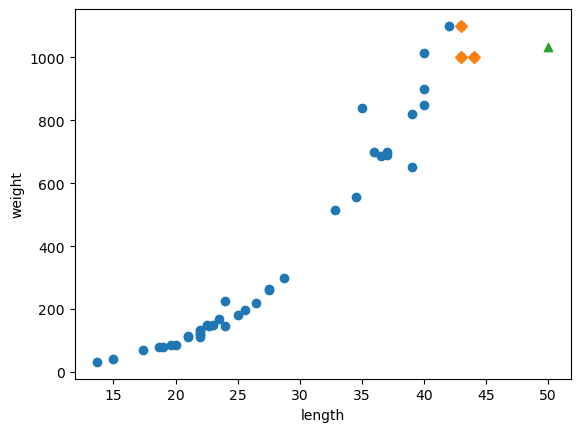

In [6]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [8]:
# 100cm 인 값을 넣어도 최근접 데이터는 1033. 이므로 문제가 있다.
# 최근접 이웃 회귀는 가지고 있는 데이터 범위을 벗어나면 예측이 어렵다.
# 물론, 길이 100cm 근처의 데이터을 학습하면 되지만 그렇지 않을 경우
# 사용하는 알고리즘이 선형회귀 이다.
print(knr.predict([[100]]))

[1033.33333333]


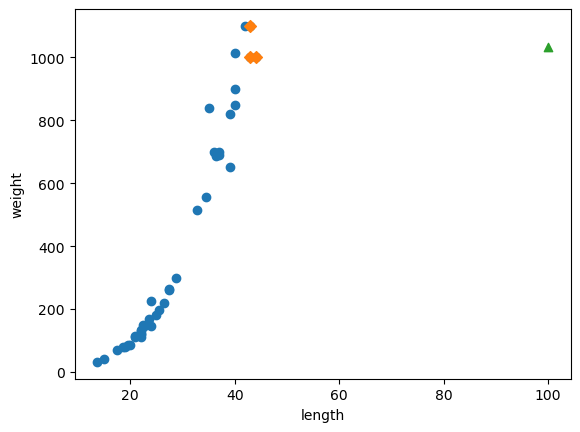

In [9]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀 (리니어 리그렉션)
#### - 선형회귀는 독립 변수(X)와 종속 변수(y)의 관계를 직선(또는 초평면)으로 모델링하는 통계/머신러닝 기법입니다.
#### - 입력값 𝑋가 주어졌을 때, 결과값 y를 예측하기 위해 아래와 같은 **선형 방정식** 을 가정합니다
#### - **y=w1​x1​+w2​x2​+⋯+wn​xn​+b**
#### - 𝑥𝑖: 입력 특성(feature), wi : 회귀 계수(weight, 기울기), b: 절편(intercept, bias)

#### 목표 : 주어진 데이터에 대해, 직선이 가장 잘 맞도록(잔차 최소화) 회귀 계수 w와 절편 𝑏를 찾는 것.(즉, 예측값과 실제값의 차이를 최소화합니다.)
#### 평가 지표
##### - 선형회귀 모델이 얼마나 잘 맞는지 평가할 때 주로 사용하는 지표는:
##### - MSE (Mean Squared Error): 오차 제곱 평균
##### - RMSE (Root Mean Squared Error): 제곱 평균근 오차
##### - MAE (Mean Absolute Error): 절댓값 평균 오차
##### - 𝑅2 (결정계수): 설명력, 1에 가까울수록 좋은 모델

#### 다음에 배울 **로지스틱 회귀**랑 밀접한 관계가 있고 **신경망 알고리즘의 기본**이 된다.

#### **모델 파라미터**는 선형 회귀가 찾는 가중치처럼 머신러닝 **모델이 특성에서 학습한 파라미터**를 말한다.
#### **다항회귀**는 **다항식을 사용**하여 **특성과 타깃 사이의 관계**를 말한다.

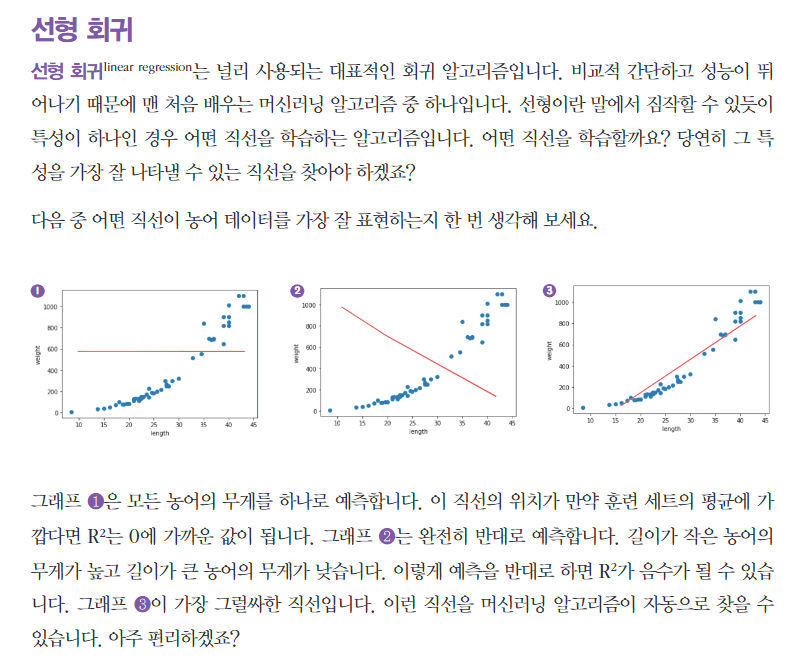

In [10]:
from IPython.display import Image, display
display(Image(filename="img/img25.png", width=600, height=400))

In [11]:
# 사이킷 런에서는 LinearRegression 클래스로 선형회귀 알고리즘을 제공하고 있음
# 사용방법은 k-최근접 알고리즘과 동일하다.
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [13]:
# 50cm 농어에 대한 예측
# 위에 훈련된 모델 lr를 이용해서  50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


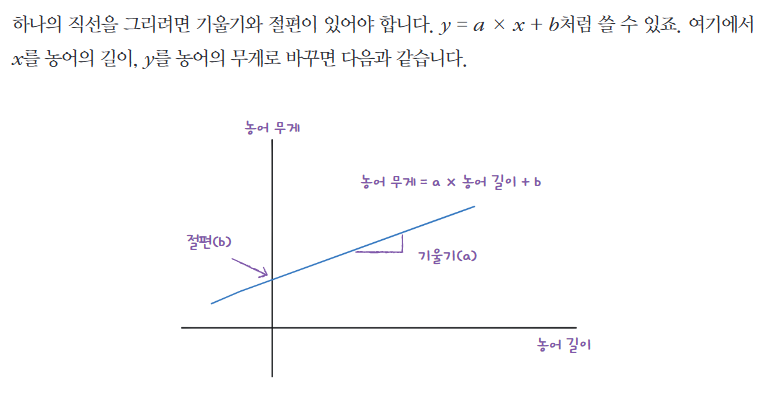

In [14]:
display(Image(filename="img/img26.png", width=600, height=400))

In [15]:
# 선형회귀에서 찾은 작업
# 직선의 방정식의 계수 값이  lr.coef_, lr.intercept_ 
# 머신러닝 알고리즘이 찾는 값 (모델 파라미터): lr.coef_, lr.intercept_ 
# 머신러닝이 알고리즘을 찾은 값 (모델 파라미터)
# coef_ => 회귀계수 (기울기) => x가 1증가할때 마다 y가 얼마나 변하는지 보여줌
# intercept_ => 절편(intercept, bias) 입력값이 0일 때, 예측되는 출력값입니다.
#               y축과 만나는 점(b)
# y = 39.0171 * X - 709.0186
# X=10 → X=11 이 되면 y는 약 39만큼 커집니다.
# X=0 일때 y축은 -709
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


50을 넣으면 위에서 나온 답과 같이 y = 39.0171 * 50 - 709.0186 => 1241.84 

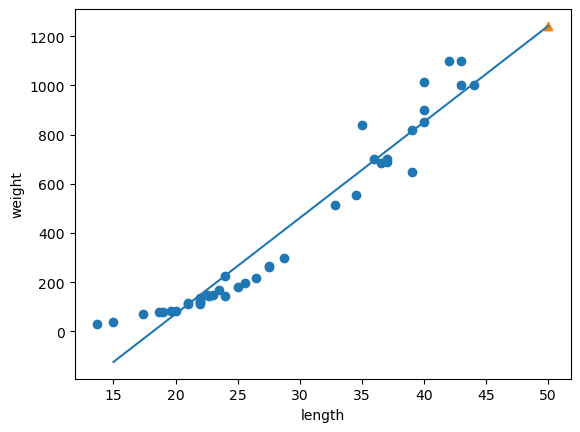

In [16]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target))   # 테스트 세트

0.939846333997604
0.8247503123313558


#### 위 의 단점은 농어의 무게가 0g 이하로 내려갈 텐데 현실에서는 있을 수 없는일 임
#### 실제는 아래 그림과 같을 것임

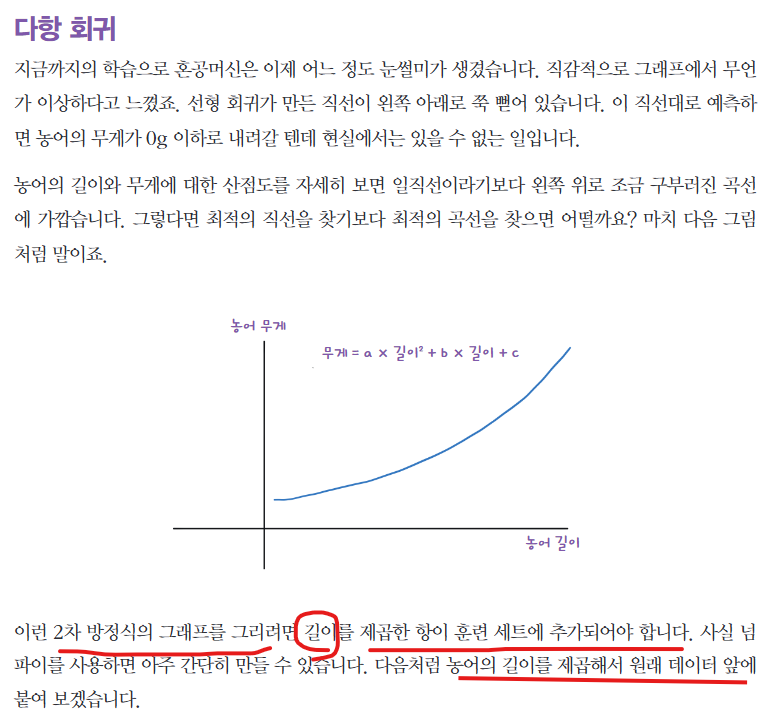

In [18]:
display(Image(filename="img/img27.png", width=600, height=400))

#### 다항 회귀 : 다항식을 상요한 선형 회귀를 다항회귀라고 함

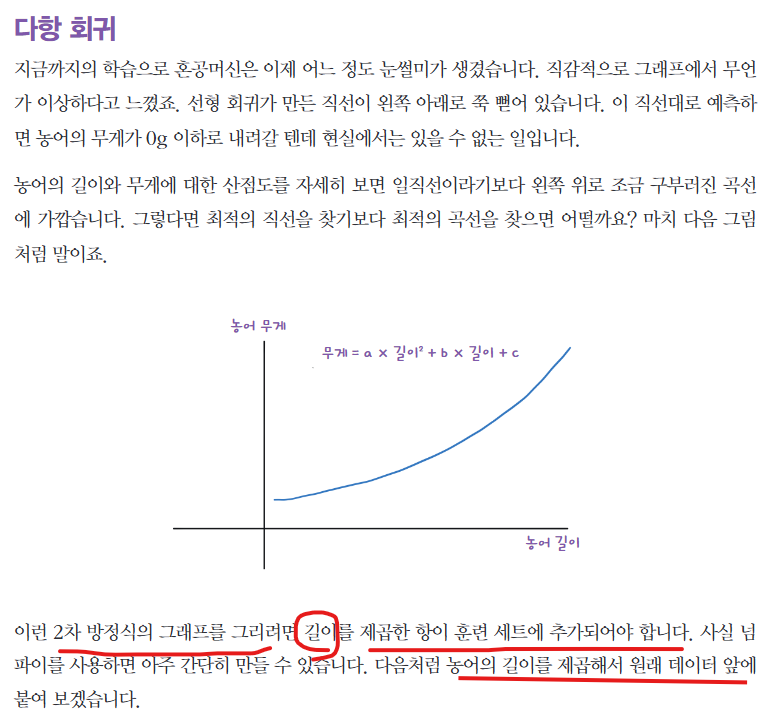

In [19]:
display(Image(filename="img/img27.png", width=600, height=400))

In [20]:
# numpy를 이용해서 길이를 제곱한 항이 훈련세트에 추가 되어야 한다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly,test_poly)
# print(train_poly.shape, test_poly.shape)  :  (42, 2) (14, 2) 

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]] [[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [1892.25  

In [21]:
# 다시 농어의 길의 제곱과 원래 길이를 함께 넣어주어야서 훈련해 보자 
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # 더 높은 값을 예측함을 알수 있다.

[1573.98423528]


In [22]:
print(lr.coef_, lr.intercept_)  

[  1.01433211 -21.55792498] 116.05021078278259


#### 이때 116.05021078278259 은 절편이다. 즉, 입력값(길이)이 0일때의 예측값(무게)이다.
#### -21.6 × 길이 => 1차 항 계수 => 기울기 조절
#### 1.01 × 길이² => 2차 항 계수 => 곡선의 휘어짐 조절

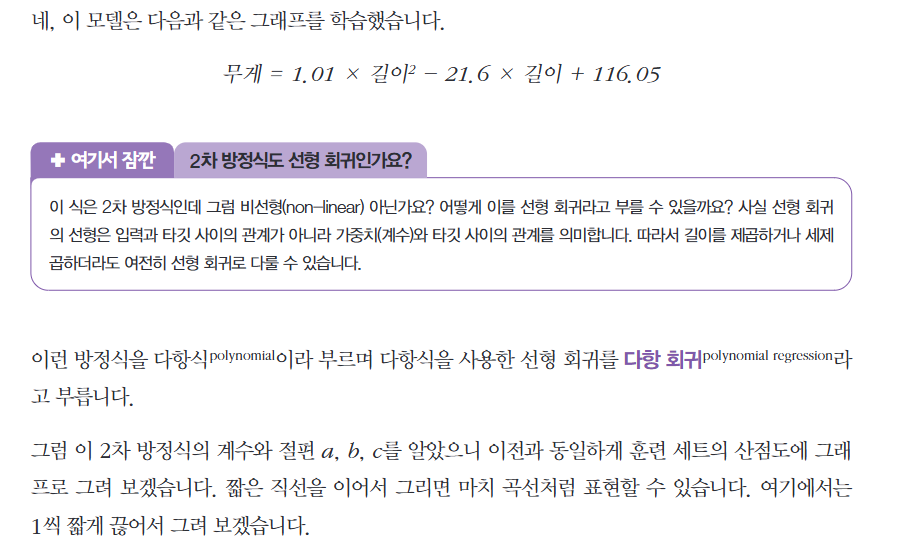

In [23]:
display(Image(filename="img/img27-1.png", width=600, height=400))

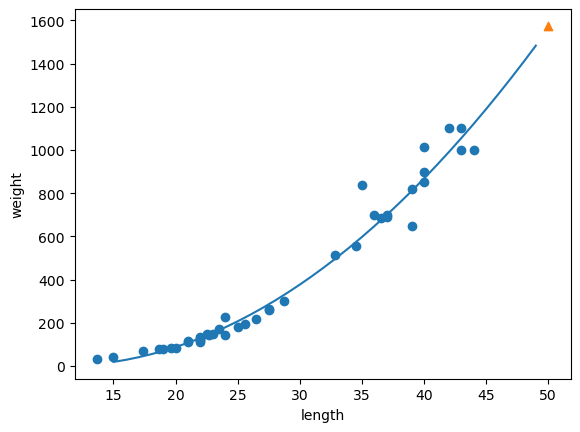

In [24]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
# 훈련세트와 테스트 세트의 R2 점수
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
